In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys

import numpy as np
import pandas as pd

sys.path.insert(0, '..')
from match.make_match_panel import make_match_panel
from match.make_summary_match_panel import make_summary_match_panel
from match.make_comparison_panel import make_comparison_panel

Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x113b30d08> (1 process) ...
Computing MoEs with 8 samplings ...
Computing p-values and FDRs with 8 permutations ...
	1/8 ...
	3/8 ...
	5/8 ...
	7/8 ...
	8/8 - done.


,Score,0.95 MoE,P-Value,FDR
Gene Set,,,,
GO_14_3_3_PROTEIN_BINDING,0.523070,0.155039,0.138889,0.583333
ONGUSAHA_TP53_TARGETS,0.188894,0.242781,0.458333,0.825000
GO_NEURON_CELL_CELL_ADHESION,-0.658196,0.118613,0.027778,0.125000
GO_SH2_DOMAIN_BINDING,0.396716,0.160424,0.194444,0.583333
YAP signature based on cell NIH3T3_MCD10A in paper GENES & DEVELOPMENT 22:1962–1971 2008,0.865167,0.019395,0.013889,0.125000
YAP signature based on mechanism,-0.865856,0.017522,0.013889,0.125000
BIOCARTA_RHO_PATHWAY,-0.373638,0.125214,0.111111,0.250000
VANTVEER_BREAST_CANCER_BRCA1_UP,-0.404066,0.331734,0.083333,0.250000
"YAP signature based on cell HEK293 in paper Cell 150, 780–791, August 17, 2012",0.283160,0.379670,0.319444,0.718750


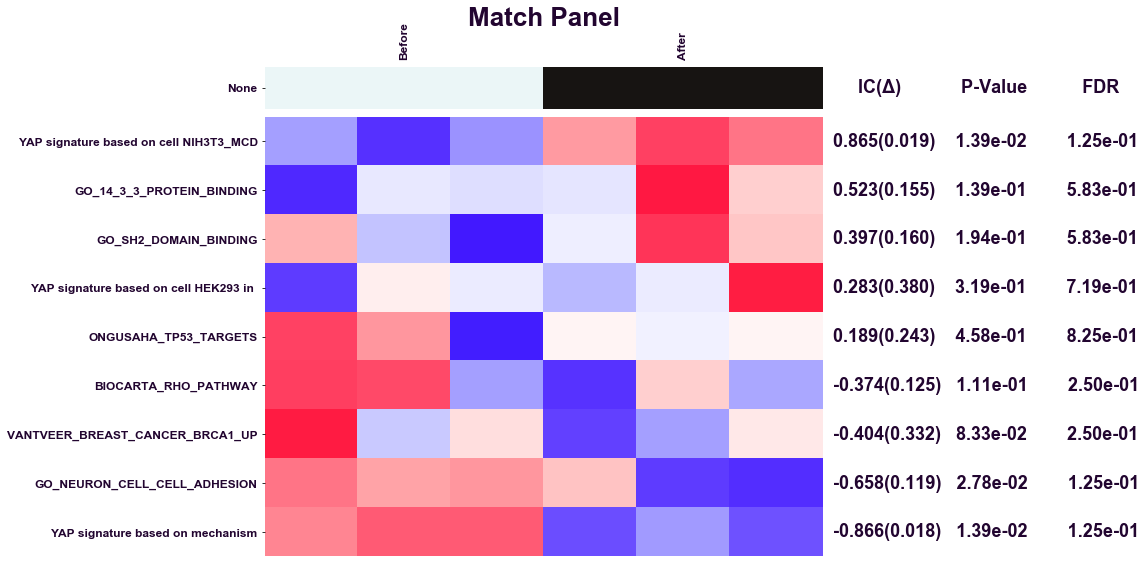

In [3]:
features = pd.read_table('gene_set_x_sample.tsv', index_col=0)

target = pd.Series((0, ) * 3 + (1, ) * 3, index=features.columns)

make_match_panel(
    target,
    features,
    target_ascending=True,
    n_job=1,
    target_int_to_str={
        0: 'Before',
        1: 'After',
    },
    target_type='binary',
    max_ytick_size=38)

In [4]:
features

,C_1_tpm,C_2_tpm,C_3_tpm,VS_1_tpm,VS_2_tpm,VS_3_tpm
Gene Set,,,,,,
GO_14_3_3_PROTEIN_BINDING,0.602756,0.611546,0.611176,0.624356,0.615042,0.611456
ONGUSAHA_TP53_TARGETS,0.557143,0.553502,0.532642,0.547047,0.548610,0.548528
GO_NEURON_CELL_CELL_ADHESION,0.448705,0.435126,0.439289,0.327090,0.316326,0.424090
GO_SH2_DOMAIN_BINDING,0.485671,0.480356,0.473279,0.489995,0.484973,0.482096
YAP signature based on cell NIH3T3_MCD10A in paper GENES & DEVELOPMENT 22:1962–1971 2008,0.530897,0.526387,0.530457,0.542299,0.540555,0.539292
YAP signature based on mechanism,0.764103,0.768179,0.768402,0.737585,0.730775,0.730607
BIOCARTA_RHO_PATHWAY,0.636011,0.635151,0.615490,0.626674,0.615976,0.607874
VANTVEER_BREAST_CANCER_BRCA1_UP,0.579176,0.555578,0.562140,0.552744,0.561404,0.547517
"YAP signature based on cell HEK293 in paper Cell 150, 780–791, August 17, 2012",0.406851,0.445383,0.437836,0.437514,0.495257,0.427421


Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x113b30d08> (1 process) ...
There is less than 5 samples after dropping nans.
There is less than 5 samples after dropping nans.
There is less than 5 samples after dropping nans.
There is less than 5 samples after dropping nans.
There is less than 5 samples after dropping nans.
There is less than 5 samples after dropping nans.
There is less than 5 samples after dropping nans.
There is less than 5 samples after dropping nans.
There is less than 5 samples after dropping nans.
There is less than 5 samples after dropping nans.
There is less than 5 samples after dropping nans.
Computing MoEs with 8 samplings ...
Computing p-values and FDRs with 8 permutations ...
	1/8 ...
There is less than 5 samples after dropping nans.
There is less than 5 samples after dropping nans.
There is less than 5 samples after dropping nans.
There is less than 5 samples after dropping nans.
There is less than 5 sa

../match/nd_array/nd_array/compute_empirical_p_value.py:13: RuntimeWarning: invalid value encountered in less_equal
  significant_random_values = random_values <= value
../match/nd_array/nd_array/compute_empirical_p_value.py:16: RuntimeWarning: invalid value encountered in greater_equal
  significant_random_values = value <= random_values


,Score,0.95 MoE,P-Value,FDR
Name,,,,
2-aminoadipate,0.360487,NaN,0.058302,0.422297
3-phosphoglycerate,0.365135,NaN,0.049440,0.401515
alpha-glycerophosphate,-0.373703,NaN,0.063899,0.600806
4-pyridoxate,0.205947,NaN,0.438899,0.861395
aconitate,0.287496,NaN,0.202892,0.730769
adenine,-0.341681,NaN,0.107276,0.743590
adipate,0.351589,NaN,0.073694,0.506410
alpha-ketoglutarate,-0.417656,NaN,0.028918,0.458333
AMP,-0.351411,NaN,0.092817,0.690972


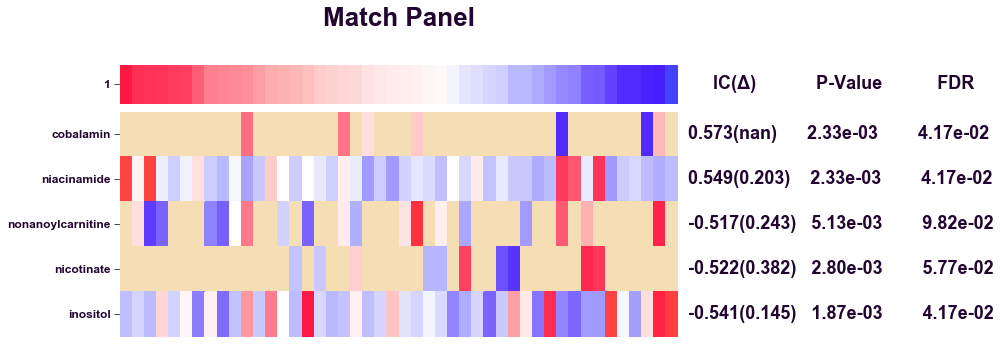

In [5]:
target = pd.read_table('target.tsv', index_col=0, header=None, squeeze=True)

features = pd.read_table('features.tsv', index_col=0)

make_match_panel(target, features, n_top_feature=3, max_n_feature=5)

In [6]:
n_row = 100
n_column = 100

Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x113b30d08> (1 process) ...
Computing MoEs with 8 samplings ...
Computing p-values and FDRs with 8 permutations ...
	1/8 ...
	3/8 ...
	5/8 ...
	7/8 ...
	8/8 - done.


,Score,0.95 MoE,P-Value,FDR
Feature 0,-0.172614,0.112099,0.15875,0.815909
Feature 1,-0.135135,NaN,0.31500,0.815909
Feature 2,0.154404,0.0975347,0.25500,0.866379
Feature 3,0.172970,0.100268,0.17375,0.907967
Feature 4,-0.131839,NaN,0.33000,0.815909
Feature 5,-0.188549,0.0899207,0.11375,0.815909
Feature 6,0.156429,0.0976962,0.24625,0.866379
Feature 7,0.170089,0.0877086,0.18000,0.907967
Feature 8,-0.125784,NaN,0.35750,0.815909
Feature 9,-0.102336,NaN,0.44250,0.815909


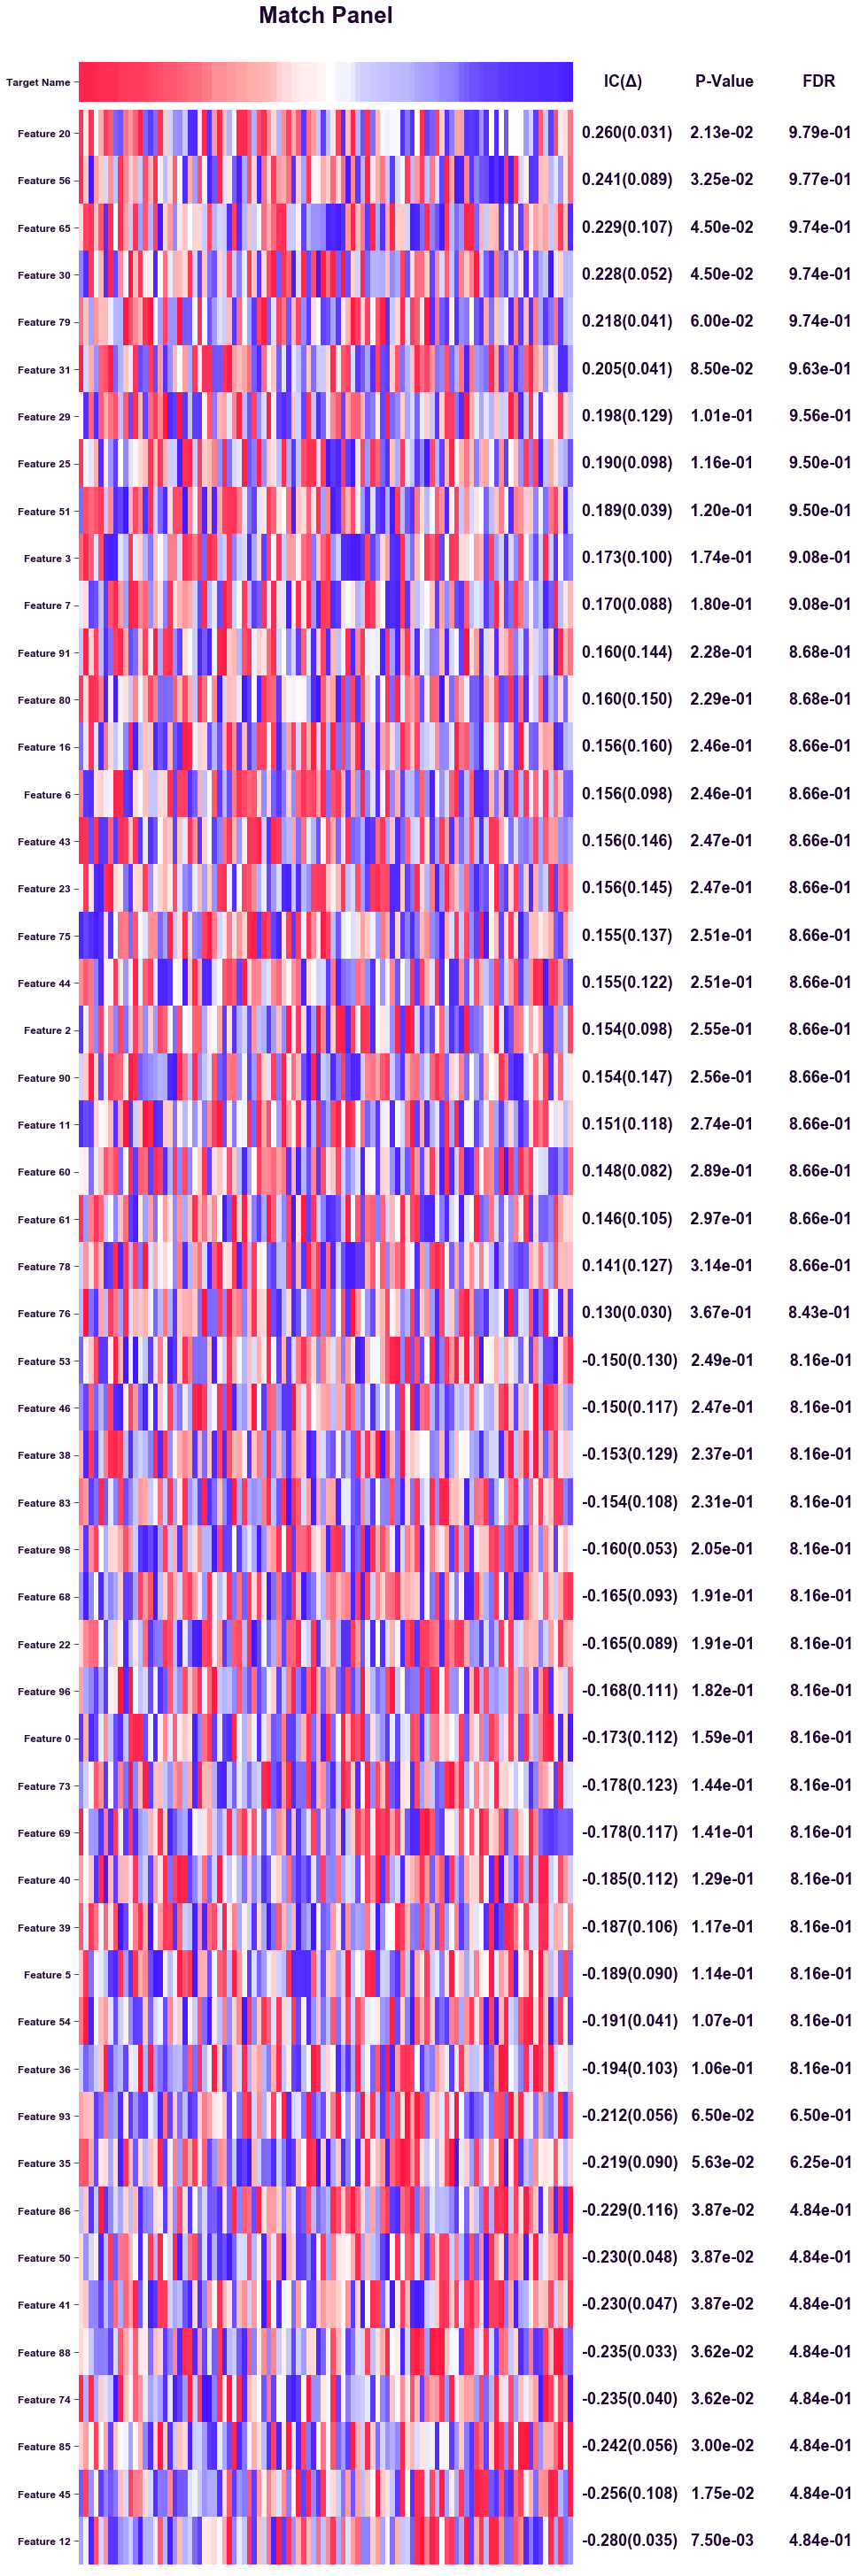

In [7]:
target = pd.Series(
    np.random.random_sample(n_column),
    name='Target Name',
    index=('Sample {}'.format(i) for i in range(n_column)))

features_continuous = pd.DataFrame(
    np.random.random_sample((
        n_row,
        n_column, )),
    index=('Feature {}'.format(i) for i in range(n_row)),
    columns=('Sample {}'.format(i) for i in range(n_column)))

make_match_panel(target, features_continuous)

Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x113b30d08> (1 process) ...


/Users/k/Jumis/conda/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: This function is deprecated. Please call randint(0, 5 + 1) instead


Computing MoEs with 8 samplings ...
Computing p-values and FDRs with 8 permutations ...
	1/8 ...
	3/8 ...
	5/8 ...
	7/8 ...
	8/8 - done.


,Score,0.95 MoE,P-Value,FDR
Feature 0,-0.205662,0.124903,0.05125,0.854167
Feature 1,-0.176227,0.123346,0.12375,0.894737
Feature 2,0.116755,NaN,0.36875,0.927885
Feature 3,0.084392,NaN,0.47375,0.927885
Feature 4,-0.121668,NaN,0.36375,0.927885
Feature 5,-0.155256,0.0903591,0.21250,0.927885
Feature 6,0.235438,0.0307706,0.01875,0.700000
Feature 7,0.173599,0.100139,0.11875,0.937500
Feature 8,-0.156792,0.0759939,0.20000,0.927885
Feature 9,-0.141340,NaN,0.27625,0.927885


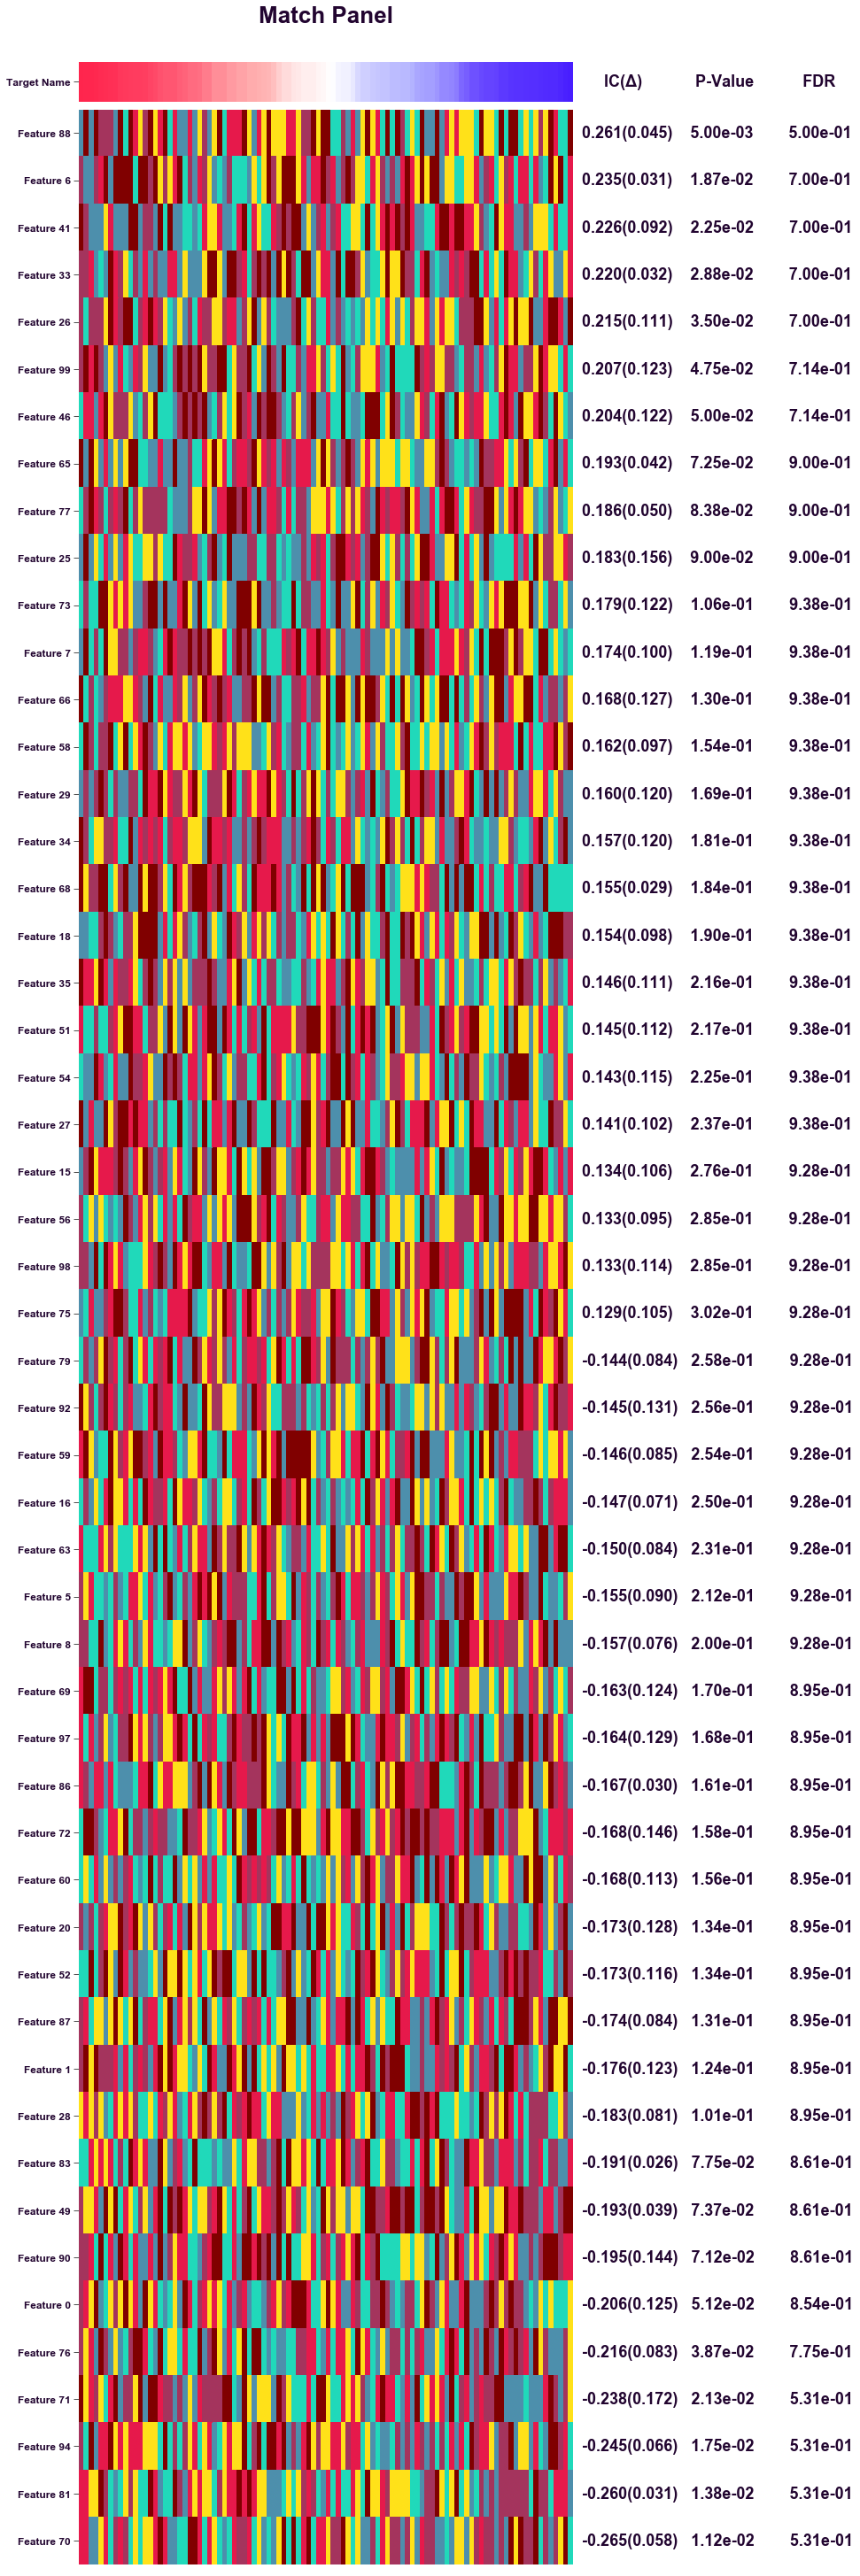

In [8]:
features_categorical = pd.DataFrame(
    np.random.random_integers(0, 5, size=(
        n_row,
        n_column, )),
    index=('Feature {}'.format(i) for i in range(n_row)),
    columns=('Sample {}'.format(i) for i in range(n_column)))

make_match_panel(target, features_categorical, features_type='categorical')

Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x113b30d08> (1 process) ...


/Users/k/Jumis/conda/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead


Computing MoEs with 8 samplings ...
Computing p-values and FDRs with 8 permutations ...
	1/8 ...
	3/8 ...
	5/8 ...
	7/8 ...
	8/8 - done.


,Score,0.95 MoE,P-Value,FDR
Feature 0,-0.127056,0.0859484,0.17375,0.827381
Feature 1,-0.188019,0.0817421,0.03625,0.500000
Feature 2,-0.102716,NaN,0.28875,0.953333
Feature 3,0.120373,0.0861565,0.19125,0.897727
Feature 4,-0.121674,0.0847652,0.18750,0.852273
Feature 5,-0.098070,NaN,0.30625,0.952055
Feature 6,-0.093406,NaN,0.32000,0.952055
Feature 7,0.091027,NaN,0.29125,0.897727
Feature 8,0.126983,0.0909986,0.16625,0.897727
Feature 9,-0.075852,NaN,0.39000,0.941288


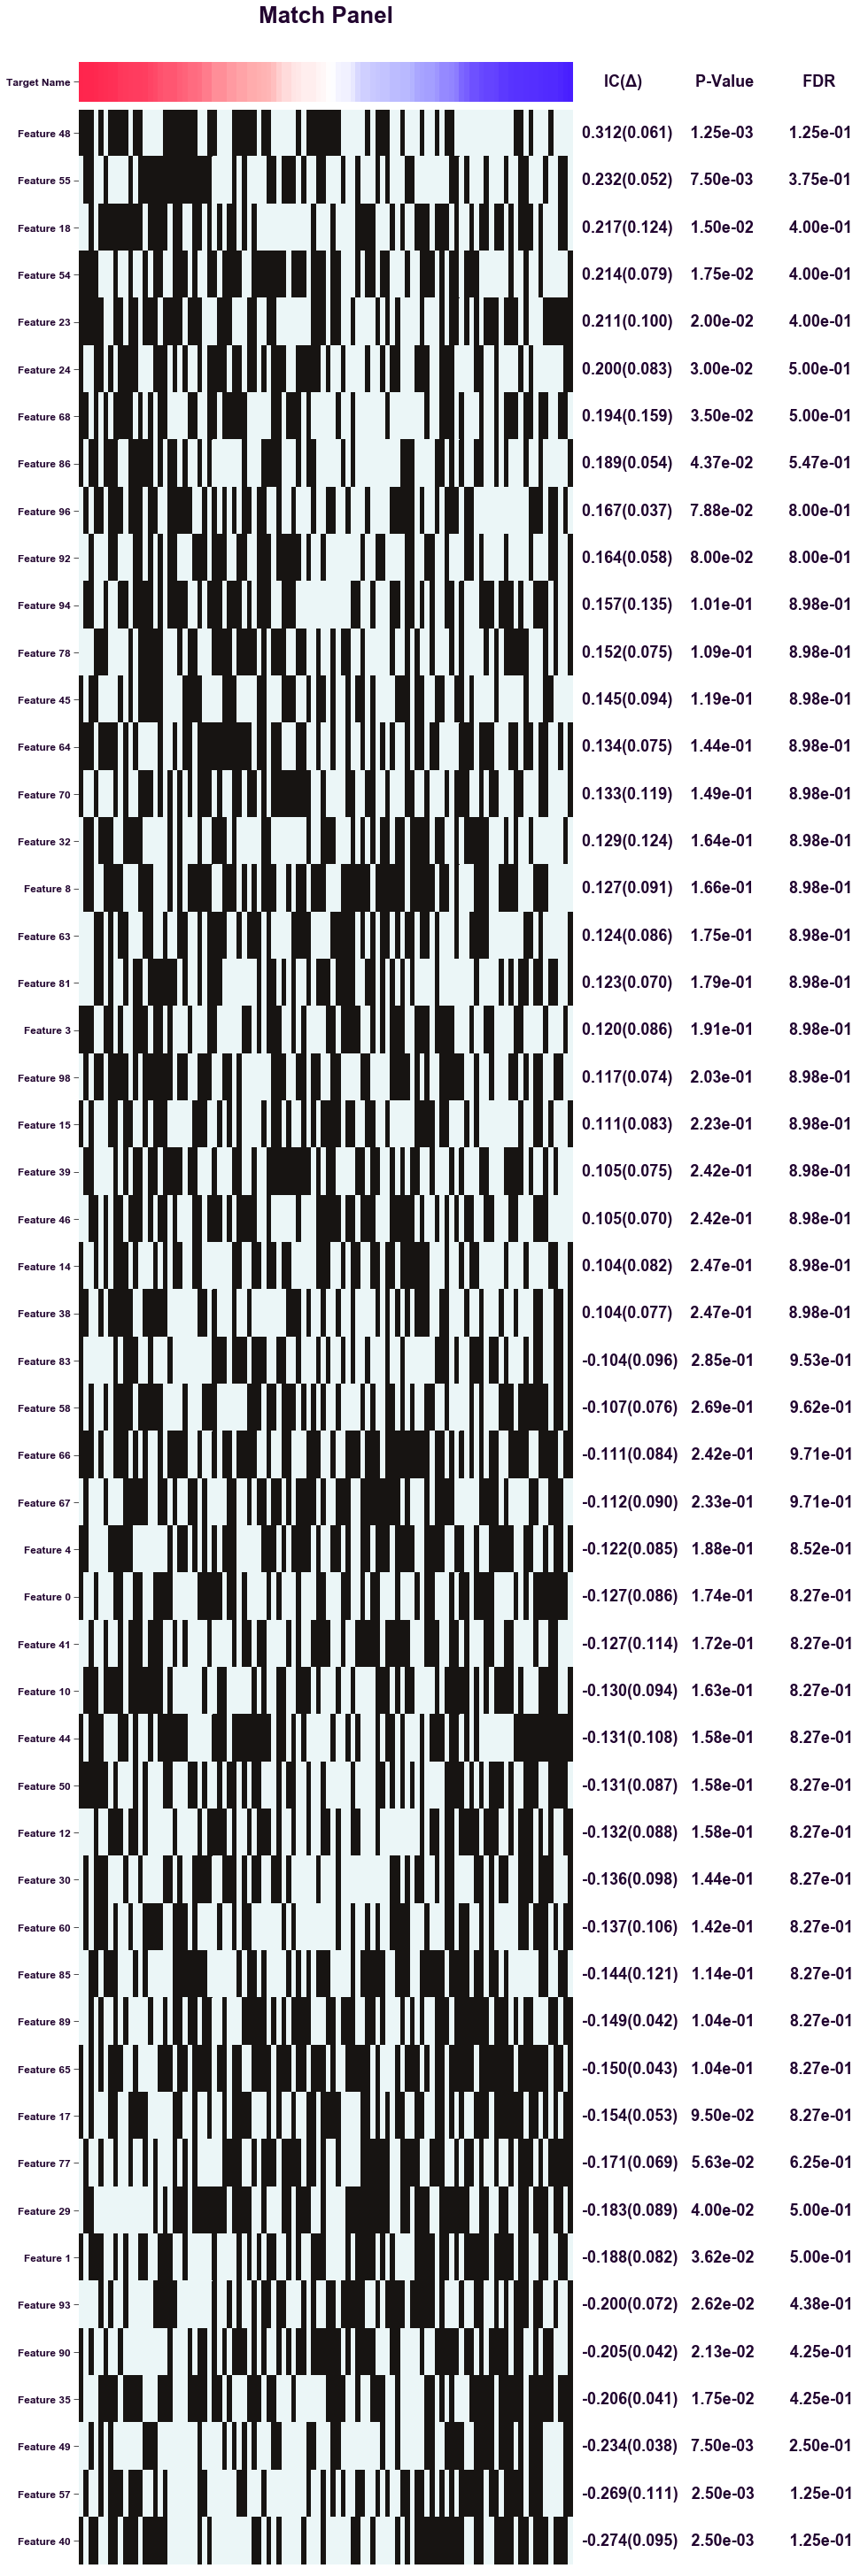

In [9]:
features_binary = pd.DataFrame(
    np.random.random_integers(0, 1, size=(
        n_row,
        n_column, )),
    index=('Feature {}'.format(i) for i in range(n_row)),
    columns=('Sample {}'.format(i) for i in range(n_column)))

make_match_panel(target, features_binary, features_type='binary')

Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x113b30d08> (1 process) ...
Computing MoEs with 8 samplings ...
Computing p-values and FDRs with 8 permutations ...
	1/8 ...
	3/8 ...
	5/8 ...
	7/8 ...
	8/8 - done.


,Score,0.95 MoE,P-Value,FDR
Feature 0,-0.172614,0.112099,0.16625,0.831250
Feature 1,-0.135135,NaN,0.31500,0.842262
Feature 2,0.154404,0.0975347,0.27875,0.892857
Feature 3,0.190556,0.134362,0.12875,0.949728
Feature 4,-0.131839,NaN,0.32875,0.842262
Feature 5,-0.188549,0.0899207,0.11875,0.763158
Feature 6,0.156429,0.0976962,0.26750,0.892857
Feature 7,0.170089,0.0877086,0.20625,0.922965
Feature 8,-0.156984,0.108258,0.22875,0.842262
Feature 9,-0.102336,NaN,0.43500,0.852431


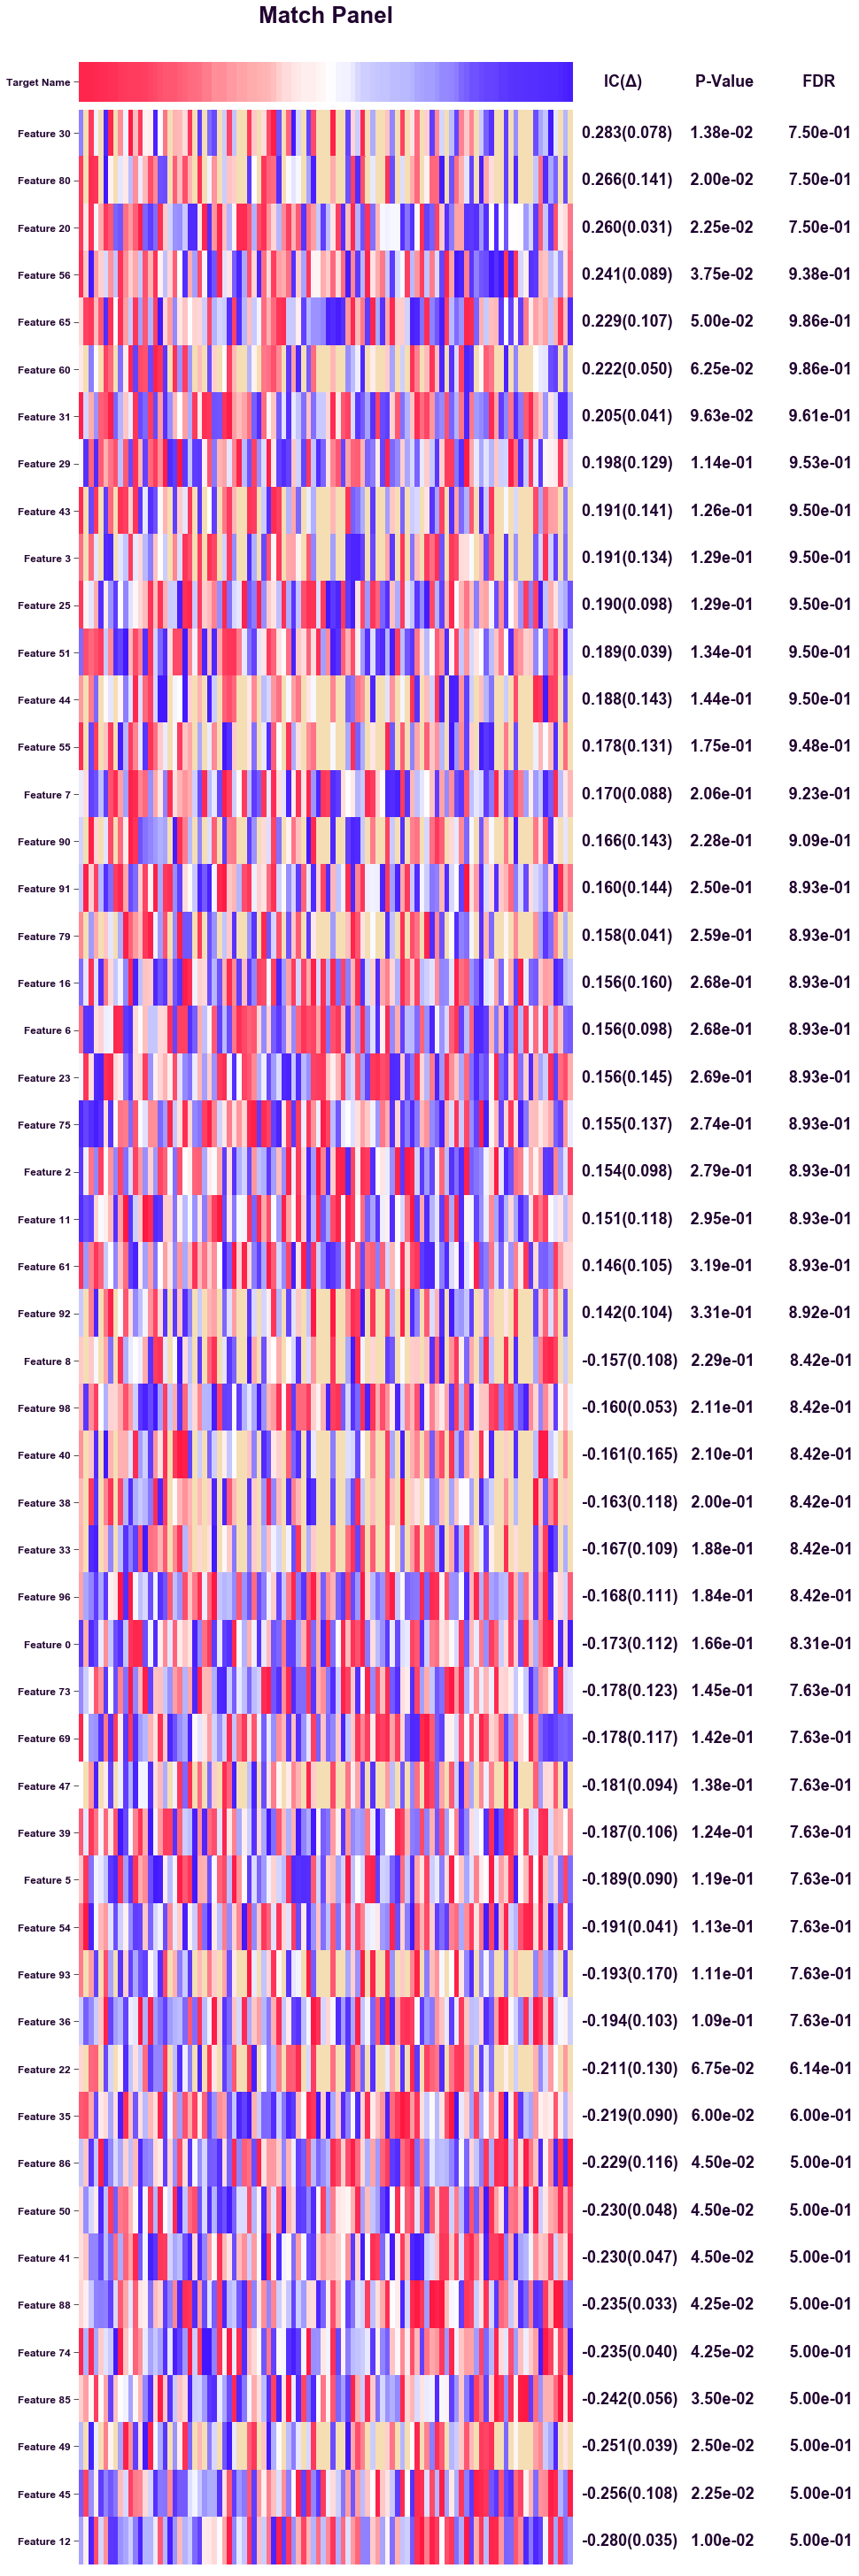

In [10]:
features_with_missing = features_continuous.copy()
features_with_missing.loc[
    np.random.choice(features_with_missing.index, size=n_column // 3),
    np.random.choice(features_with_missing.columns, size=n_column // 3)] = None

make_match_panel(target, features_with_missing)

In [11]:
n = 3

multiple_features = {
    'Continuous features': {
        'df': features_continuous.iloc[:n, :],
        'indices': ['Feature {}'.format(i) for i in range(n)],
        'index_aliases': ['Alias {}'.format(i) for i in range(n)],
        'emphasis': 'high',
        'data_type': 'continuous',
    },
    'Categorical features': {
        'df': features_categorical.iloc[:n, :],
        'indices': ['Feature {}'.format(i) for i in range(n)],
        'index_aliases': ['Alias {}'.format(i) for i in range(n)],
        'emphasis': 'high',
        'data_type': 'categorical',
    },
    'Binary features': {
        'df': features_binary.iloc[:n, :],
        'indices': ['Feature {}'.format(i) for i in range(n)],
        'index_aliases': ['Alias {}'.format(i) for i in range(n)],
        'emphasis': 'high',
        'data_type': 'binary',
    },
    'Cotinuous features (missing last 10 & scores ascending)': {
        'df': features_continuous.iloc[:n, :-10],
        'indices': ['Feature {}'.format(i) for i in range(n)],
        'index_aliases': ['Alias {}'.format(i) for i in range(n)],
        'emphasis': 'low',
        'data_type': 'continuous',
    },
    'Cotinuous features (missing first 10 & scores ascending)': {
        'df': features_continuous.iloc[:n, 10:],
        'indices': ['Feature {}'.format(i) for i in range(n)],
        'index_aliases': ['Alias {}'.format(i) for i in range(n)],
        'emphasis': 'low',
        'data_type': 'continuous',
    },
}

Making match panel for Continuous features ...
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x113b30d08> (1 process) ...
Computing MoEs with 8 samplings ...
Computing p-values and FDRs with 8 permutations ...
	1/8 ...
	3/8 ...
	5/8 ...
	7/8 ...
	8/8 - done.
Making match panel for Categorical features ...
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x113b30d08> (1 process) ...
Computing MoEs with 8 samplings ...
Computing p-values and FDRs with 8 permutations ...
	1/8 ...
	3/8 ...
	5/8 ...
	7/8 ...
	8/8 - done.
Making match panel for Binary features ...
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x113b30d08> (1 process) ...
Computing MoEs with 8 samplings ...
Computing p-values and FDRs with 8 permutations ...
	1/8 ...
	3/8 ...
	5/8 ...
	7/8 ...
	8/8 - done.
Making match panel for Cotinuous features (missing last 10 & 

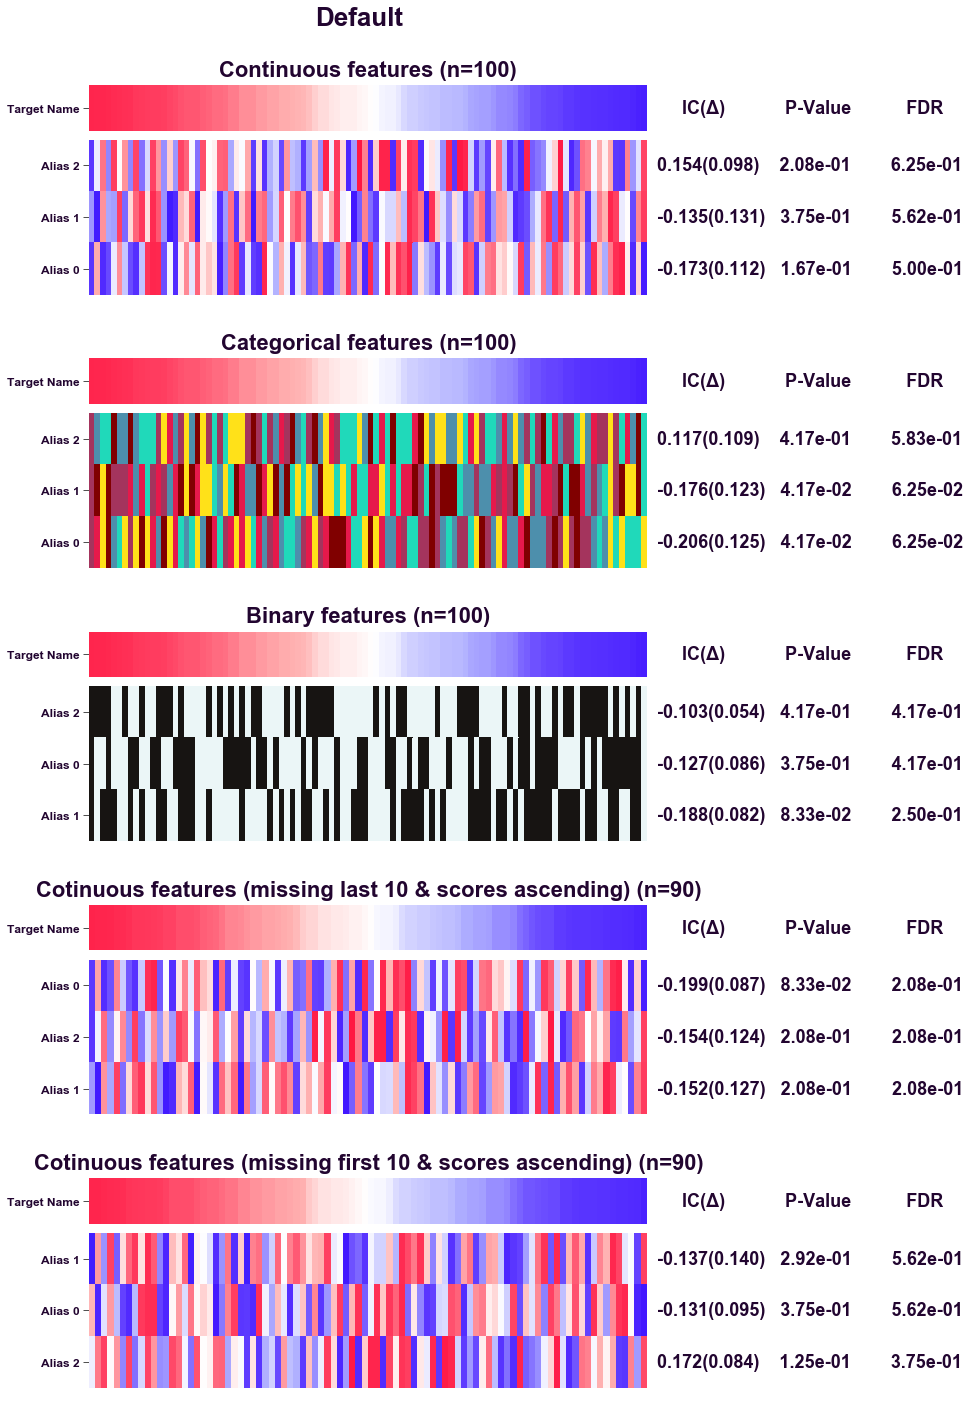

In [12]:
make_summary_match_panel(
    target, multiple_features, title='Default', plot_column_names=True)

Making match panel for Continuous features ...
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x113b30d08> (1 process) ...
Computing MoEs with 8 samplings ...
Computing p-values and FDRs with 8 permutations ...
	1/8 ...
	3/8 ...
	5/8 ...
	7/8 ...
	8/8 - done.
Making match panel for Categorical features ...
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x113b30d08> (1 process) ...
Computing MoEs with 8 samplings ...
Computing p-values and FDRs with 8 permutations ...
	1/8 ...
	3/8 ...
	5/8 ...
	7/8 ...
	8/8 - done.
Making match panel for Binary features ...
Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x113b30d08> (1 process) ...
Computing MoEs with 8 samplings ...
Computing p-values and FDRs with 8 permutations ...
	1/8 ...
	3/8 ...
	5/8 ...
	7/8 ...
	8/8 - done.
Making match panel for Cotinuous features (missing last 10 & 

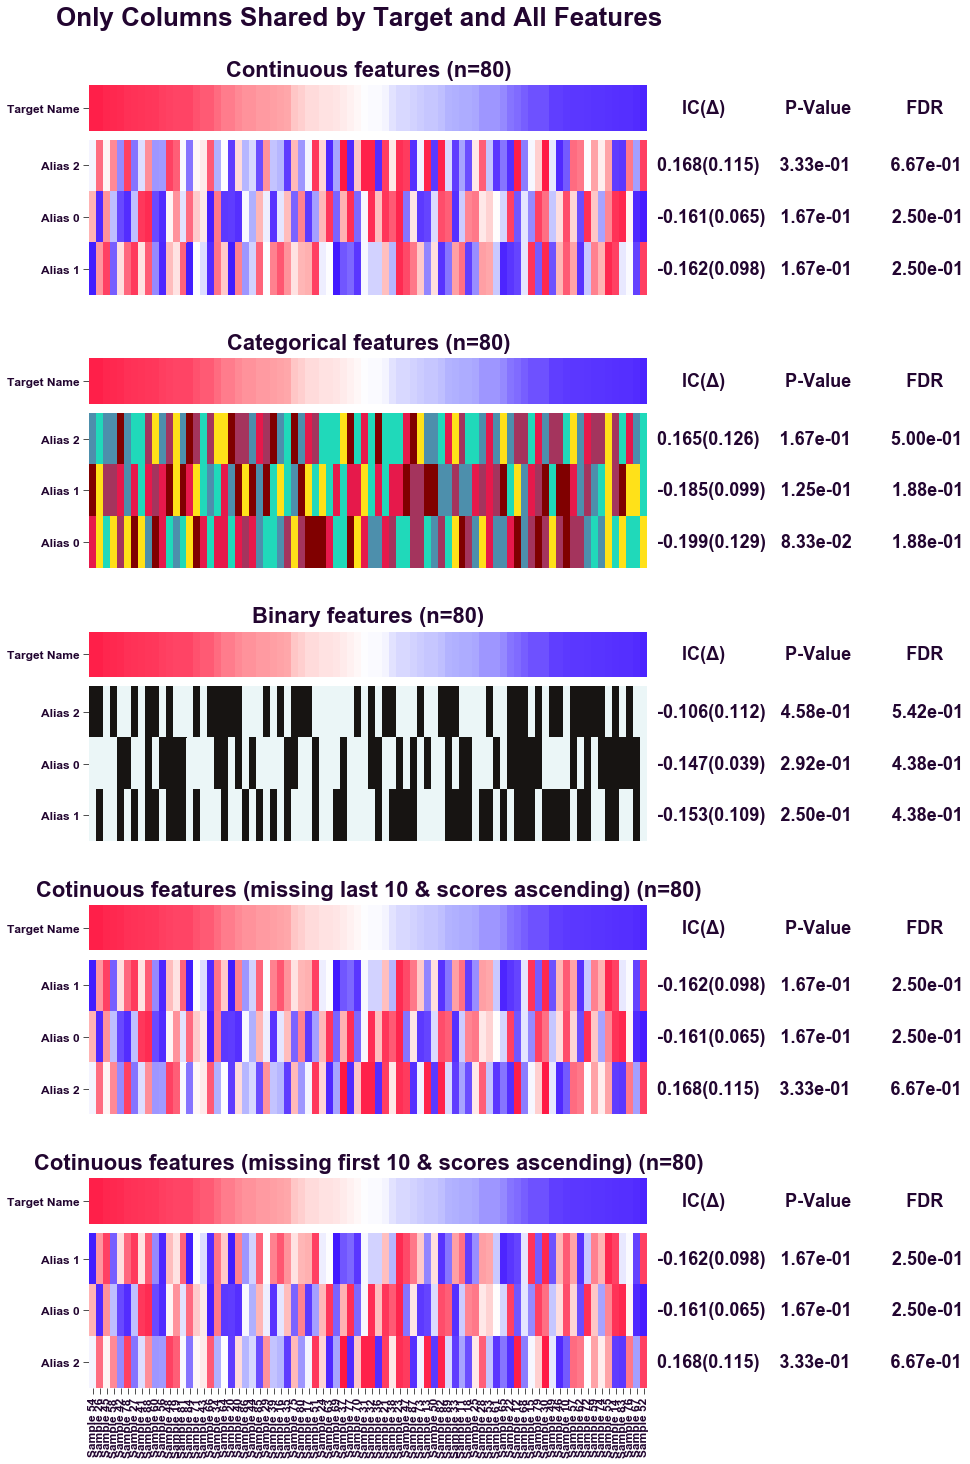

In [13]:
make_summary_match_panel(
    target,
    multiple_features,
    plot_only_columns_shared_by_target_and_all_features=True,
    title='Only Columns Shared by Target and All Features',
    plot_column_names=True)

Applying <function compute_information_coefficient at 0x113b30d08> ...
	1/2 ...
	2/2 - done.


array([[ 0.16970503,  0.21724913, -0.20936514, -0.17654047, -0.19053862,
        -0.21464652,  0.16438303,  0.15368636],
       [ 0.2634767 ,  0.1401265 ,  0.1644644 , -0.15065849, -0.1271109 ,
        -0.08875544,  0.14824489,  0.20719624]])

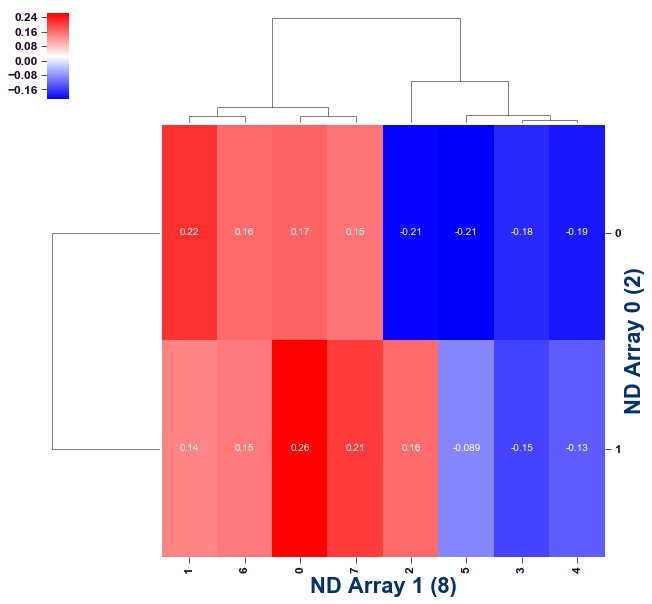

In [14]:
array_2d_0 = np.random.random_sample((
    n_row,
    2, ))

array_2d_1 = np.random.random_sample((
    n_row,
    8, ))

make_comparison_panel(
    array_2d_0,
    array_2d_1,
    array_2d_0_name='ND Array 0',
    array_2d_1_name='ND Array 1')